In [2]:
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the data file
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [4]:
df.shape

(768, 9)

In [5]:
df.describe()
#here u can see that diabetes min, nalue is zero actually it can't be

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

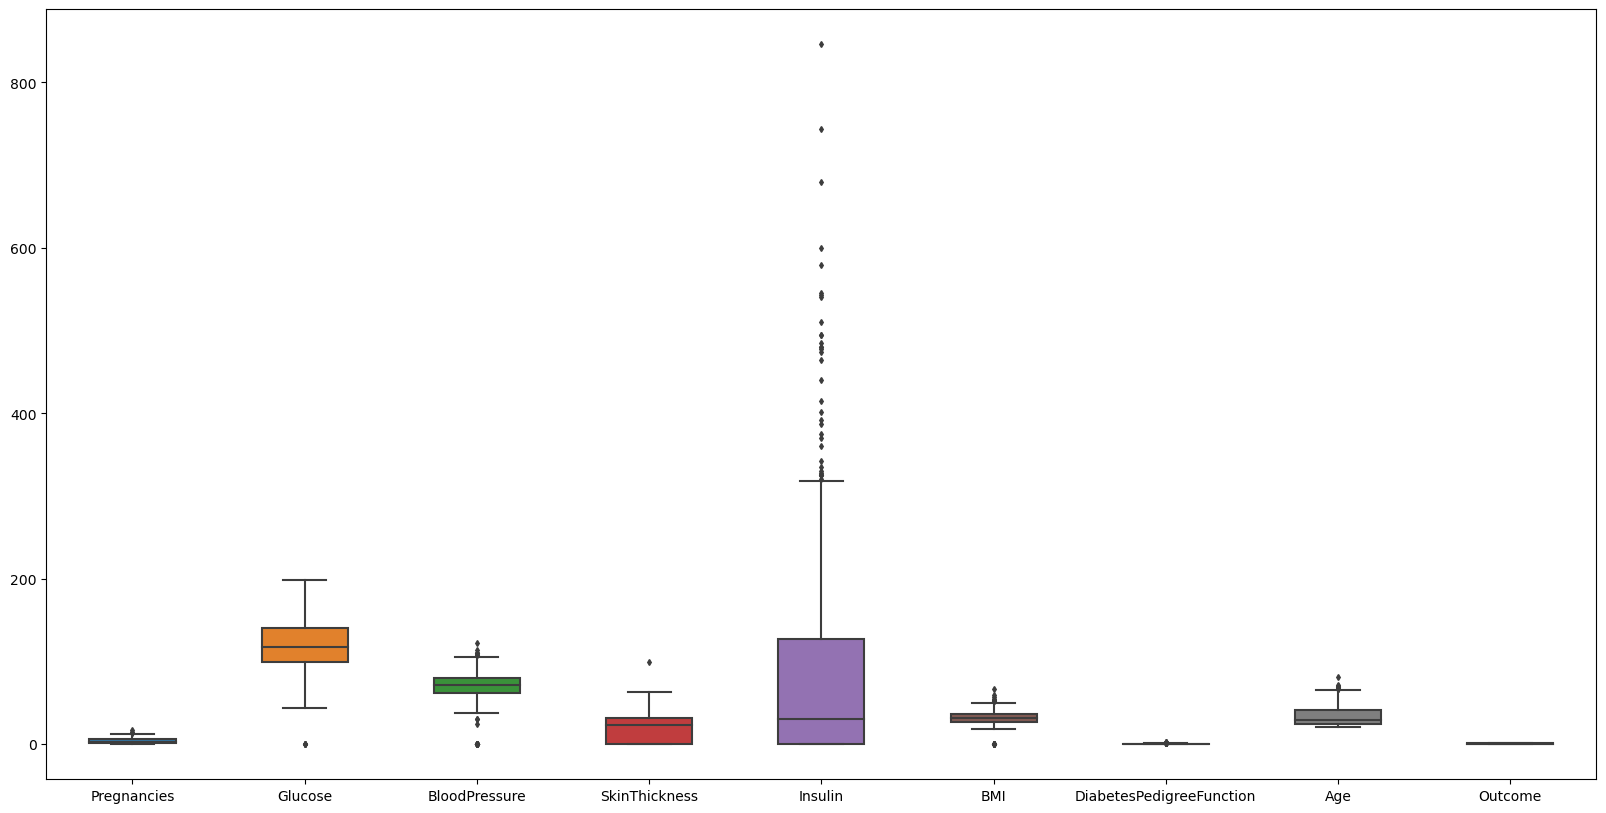

In [7]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df, width= .5,ax=ax,  fliersize=3)

In [ ]:
#We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.
#Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
#Let's do the latter.

In [10]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())



In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [13]:
#segregate the dependent and independent variable
X = df.iloc[:,:-1]
y = df['Outcome']

In [14]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
# separate dataset into train and test
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)
x_train.shape, x_test.shape

((576, 8), (192, 8))

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [19]:
x_train_scaled.shape,x_test_scaled.shape

((576, 8), (192, 8))

In [20]:
x_train_scaled

array([[ 2.80346794,  0.24258793, -0.25110513, ...,  1.10366684,
         0.29608546,  0.96352088],
       [ 0.07832678,  0.24258793,  1.14476384, ...,  0.40523314,
        -0.70087555, -0.86295593],
       [-0.22446668, -2.01997244,  0.81427371, ...,  0.30337823,
        -0.66548048,  1.13747105],
       ...,
       [ 1.89508755, -0.68905457,  1.14476384, ...,  1.93305686,
         1.96850229,  0.44167036],
       [-1.13284707,  0.64186329, -0.25110513, ...,  1.46743439,
        -0.77756486, -0.34110542],
       [-1.13284707,  0.10949615,  1.97098917, ..., -1.42815531,
        -0.6094383 , -1.03690611]])

In [21]:
x_test_scaled

array([[ 0.6839137 , -0.78887341, -1.16866709, ...,  0.24517542,
        -0.11390738,  0.87654579],
       [-0.52726014, -0.32305216,  0.23591598, ...,  0.49253736,
        -0.94569142, -1.03690611],
       [-0.52726014, -0.45614395, -0.67293189, ..., -0.22044704,
        -0.91619553, -1.03690611],
       ...,
       [ 0.6839137 ,  0.04295025, -0.01195162, ...,  0.18697261,
         0.77981801,  0.09377001],
       [-0.22446668, -1.45433234, -1.82964735, ..., -0.19134564,
        -0.65073254, -0.60203068],
       [-0.22446668, -0.52268984, -0.01195162, ..., -0.94798215,
        -0.77166568, -0.51505559]])

In [22]:
lr = LogisticRegression()

lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [25]:
## Hyperparameter Tuning
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}


In [26]:
clf = GridSearchCV(lr,# model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

clf.fit(x_train_scaled,y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [27]:
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [28]:
clf.best_score_

0.7759225650332727

In [30]:
#let's see how well our model performs on the test data set.
y_pred = clf.predict(x_test_scaled)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [31]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[99, 24],
       [28, 41]], dtype=int64)

In [32]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7291666666666666

In [33]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8048780487804879

In [34]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7795275590551181

In [35]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.792

In [36]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

In [37]:
pickle.dump(lr,open('lr.pkl','wb'))